# Disease Diagnosis Prediction
## Overview
This notebook implements a machine learning pipeline to predict diabetes outcomes using the PIMA Diabetes dataset. The process includes:
- Data loading and exploration
- Preprocessing and feature selection
- Model training using various algorithms
- Evaluation using classification metrics and ROC analysis

## Importing Libraries

In [2]:
##Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Loading and Previewing Dataset

In [4]:
## Loading and Previewing PIMA Diabetes Dataset
df= pd.read_csv('diabetes.csv')

In [5]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Performing Exploratory Data Analysis

In [8]:
## Performing EDA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [10]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


## Correlation Analysis

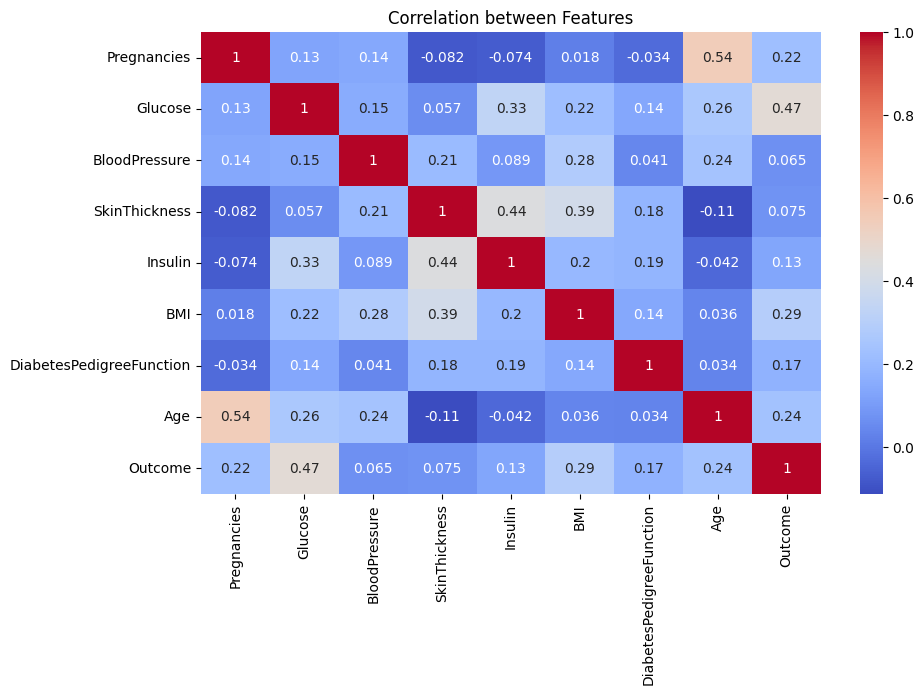

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()

## Feature Selection adn Prerprocessing

In [12]:
##Feature Selection and Data Scaling
# Split into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
# Select top 6 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features for Modeling:", selected_features.tolist())


Selected Features for Modeling: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [14]:
# Standardize selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [15]:
##Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Model Training and Evaluation
- Gradient Boosting
- SVM
- Neural Networks

In [16]:
# Model Training and Evaluation
# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000)
}


Gradient Boosting Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

AUC-ROC Score: 0.837

SVM Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

AUC-ROC Score: 0.795

Neural Network (MLP) Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66

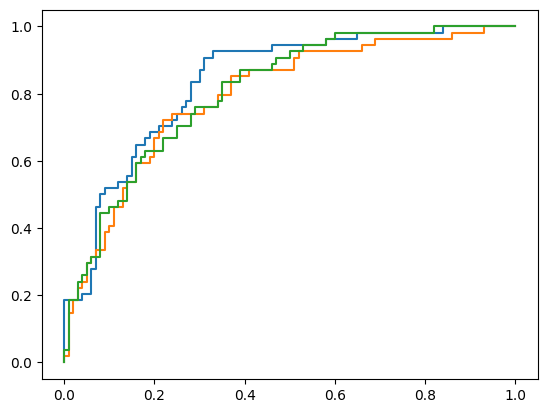

In [17]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name} Model Evaluation:")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC Score: {roc_auc:.3f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

## ROC-Curve Visualization

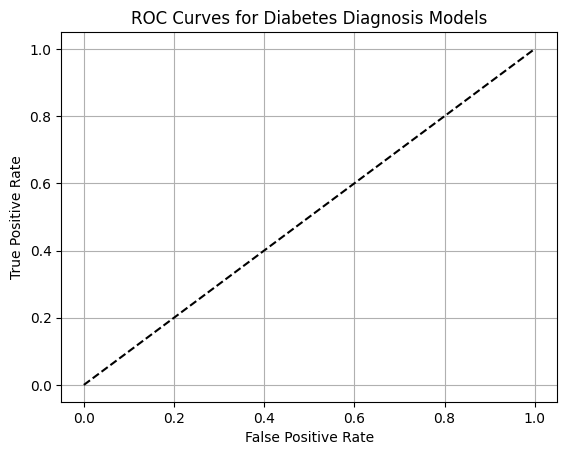

In [20]:
 # ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Diagnosis Models')
plt.grid(True)
plt.show()

## Final Insights

In [21]:
# Final Insights
print("\n🩺 Insights for Healthcare Professionals:")
print(f"- Key features influencing diabetes prediction: {selected_features.tolist()}")
print("- Gradient Boosting and Neural Networks showed strong predictive performance.")
print("- These models can support early detection and intervention strategies for diabetes.")


🩺 Insights for Healthcare Professionals:
- Key features influencing diabetes prediction: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
- Gradient Boosting and Neural Networks showed strong predictive performance.
- These models can support early detection and intervention strategies for diabetes.
